#PRE-PROCESSING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm
sb.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Assignment 02/bank-full.csv')

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [ ]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

#EXPLORATORY DATA ANALYSIS


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


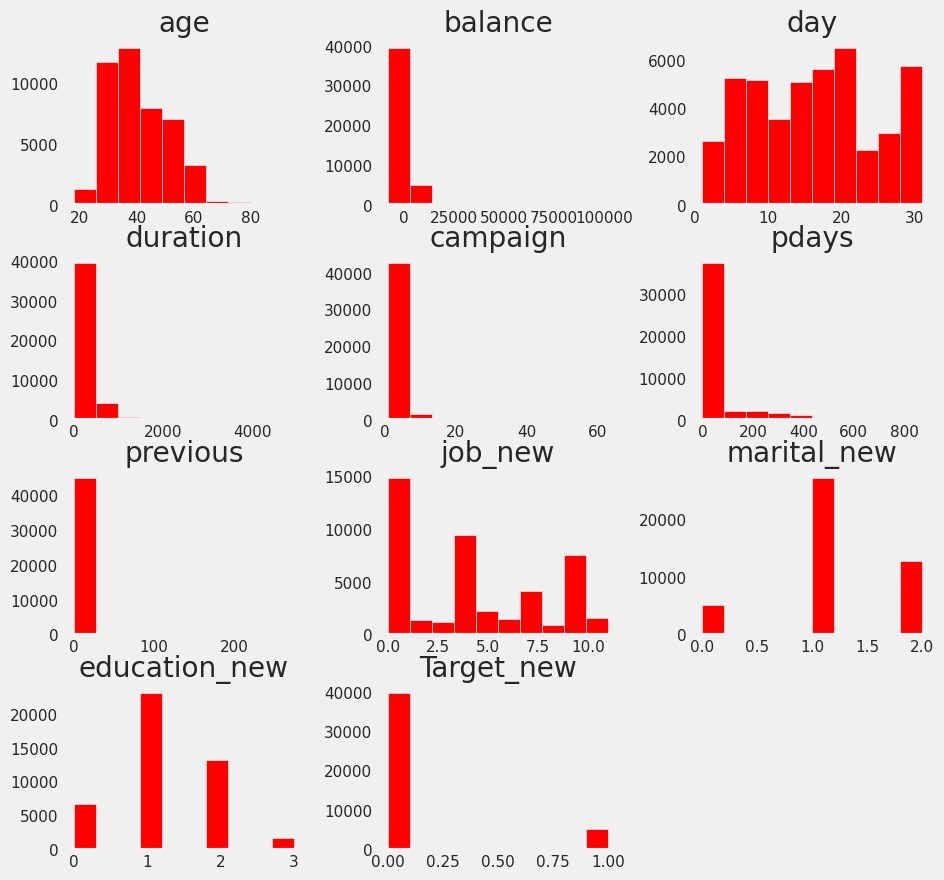

In [ ]:
data.hist(figsize=(10,10),color="red",grid=False)
plt.show()

In [ ]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

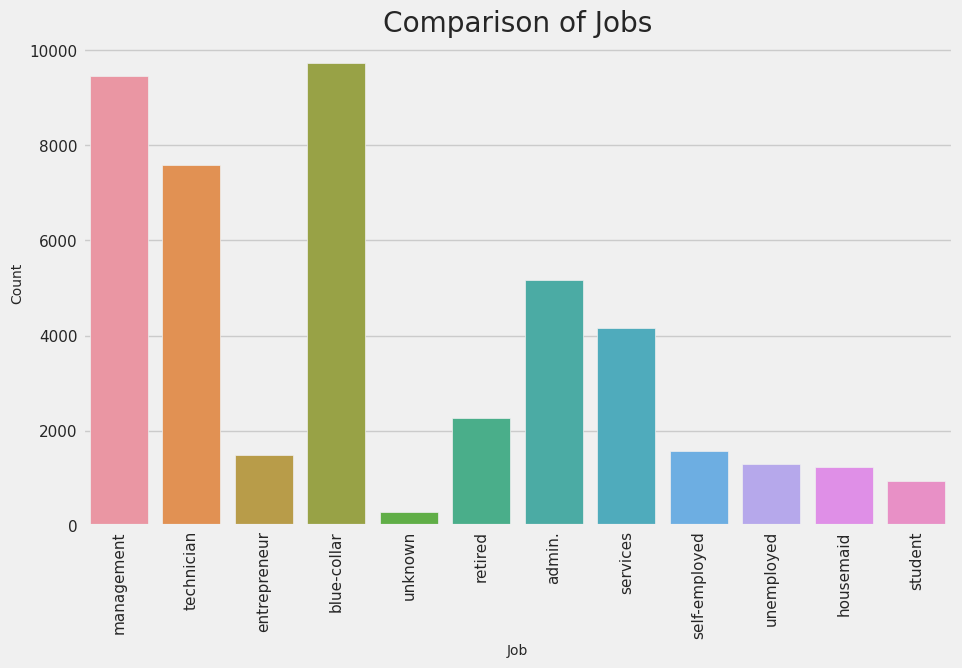

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = data,  x = 'job')
plt.title('Comparison of Jobs', fontweight=10)
plt.xlabel('Job', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()


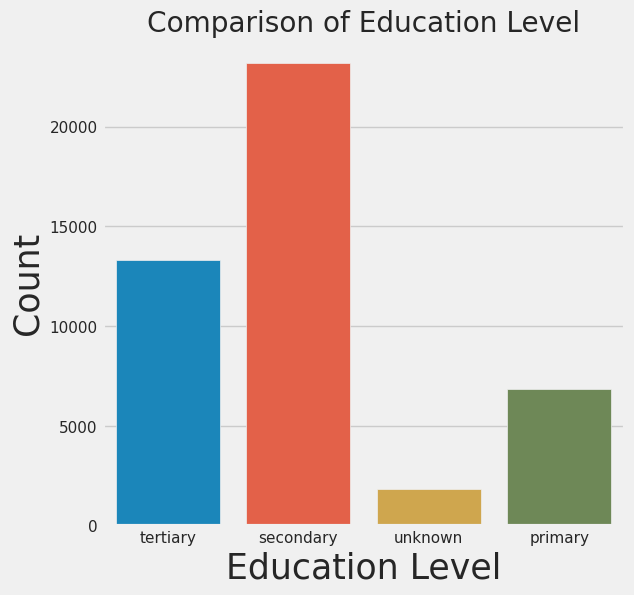

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = data,  x = 'education')
plt.title('Comparison of Education Level', fontweight=27)
plt.xlabel('Education Level', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

<Axes: xlabel='education', ylabel='age'>

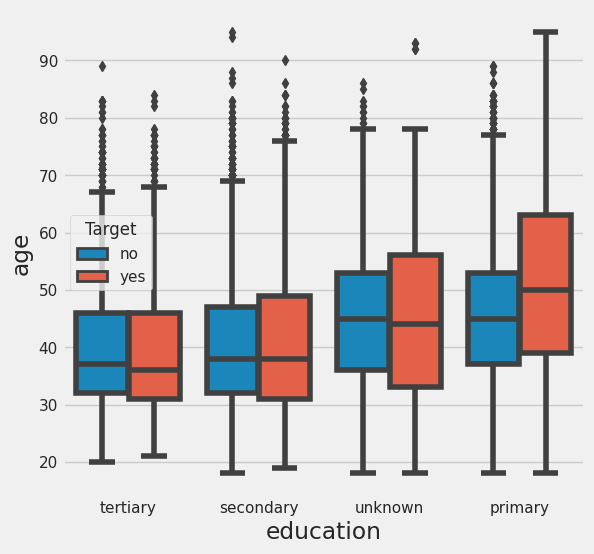

In [ ]:
sb.boxplot(x='education',y='age',hue='Target',data=data)

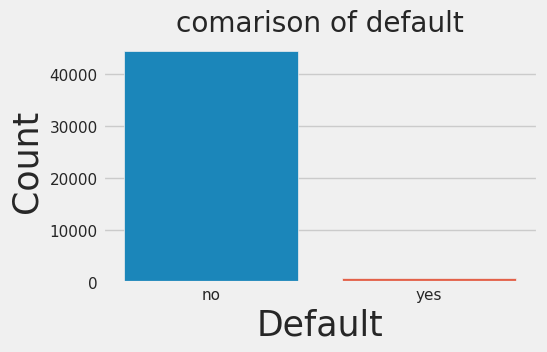

In [ ]:
plt.rcParams['figure.figsize']=(5,3)
plt.style.use('fivethirtyeight')

sb.countplot(data=data,x='default')
plt.title('comarison of default', fontweight=25)
plt.xlabel('Default', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

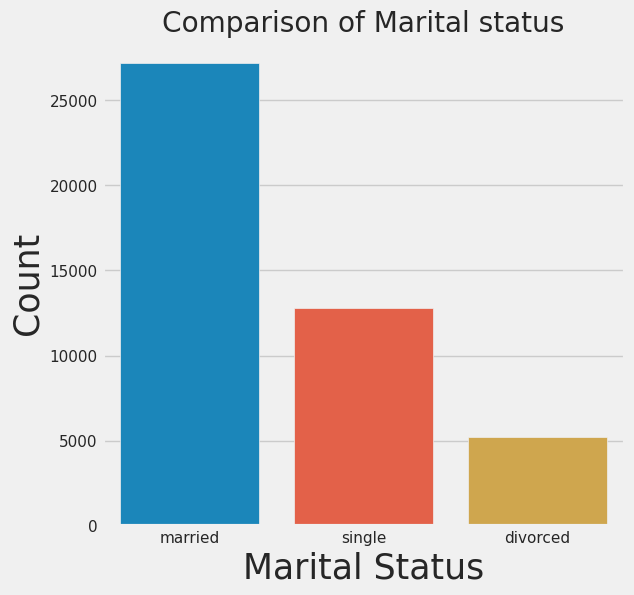

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = data,  x = 'marital')
plt.title('Comparison of Marital status', fontweight=27)
plt.xlabel('Marital Status', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

<Axes: xlabel='marital', ylabel='age'>

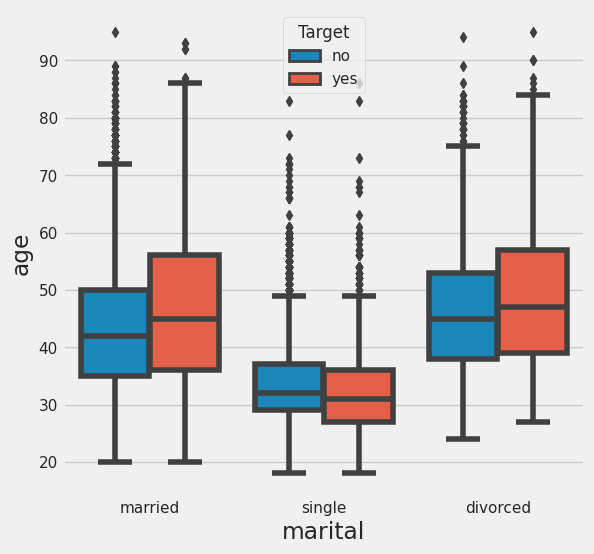

In [ ]:
sb.boxplot(x='marital',y='age',hue='Target',data=data)

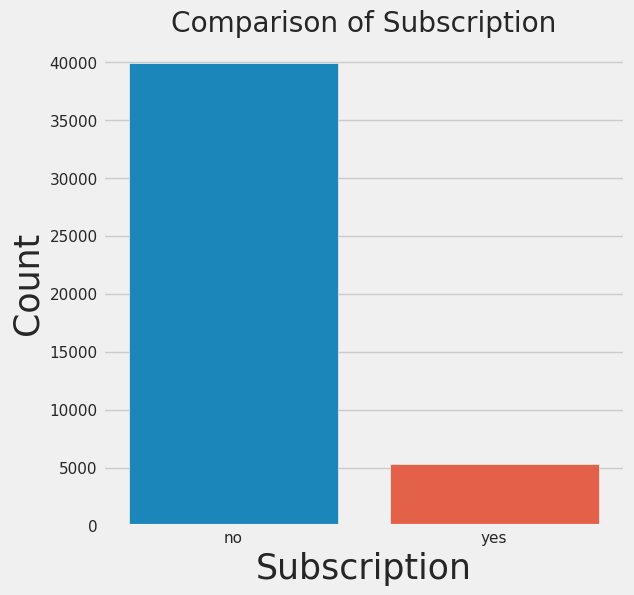

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = data,  x = 'Target')
plt.title('Comparison of Subscription', fontweight=27)
plt.xlabel('Subscription', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

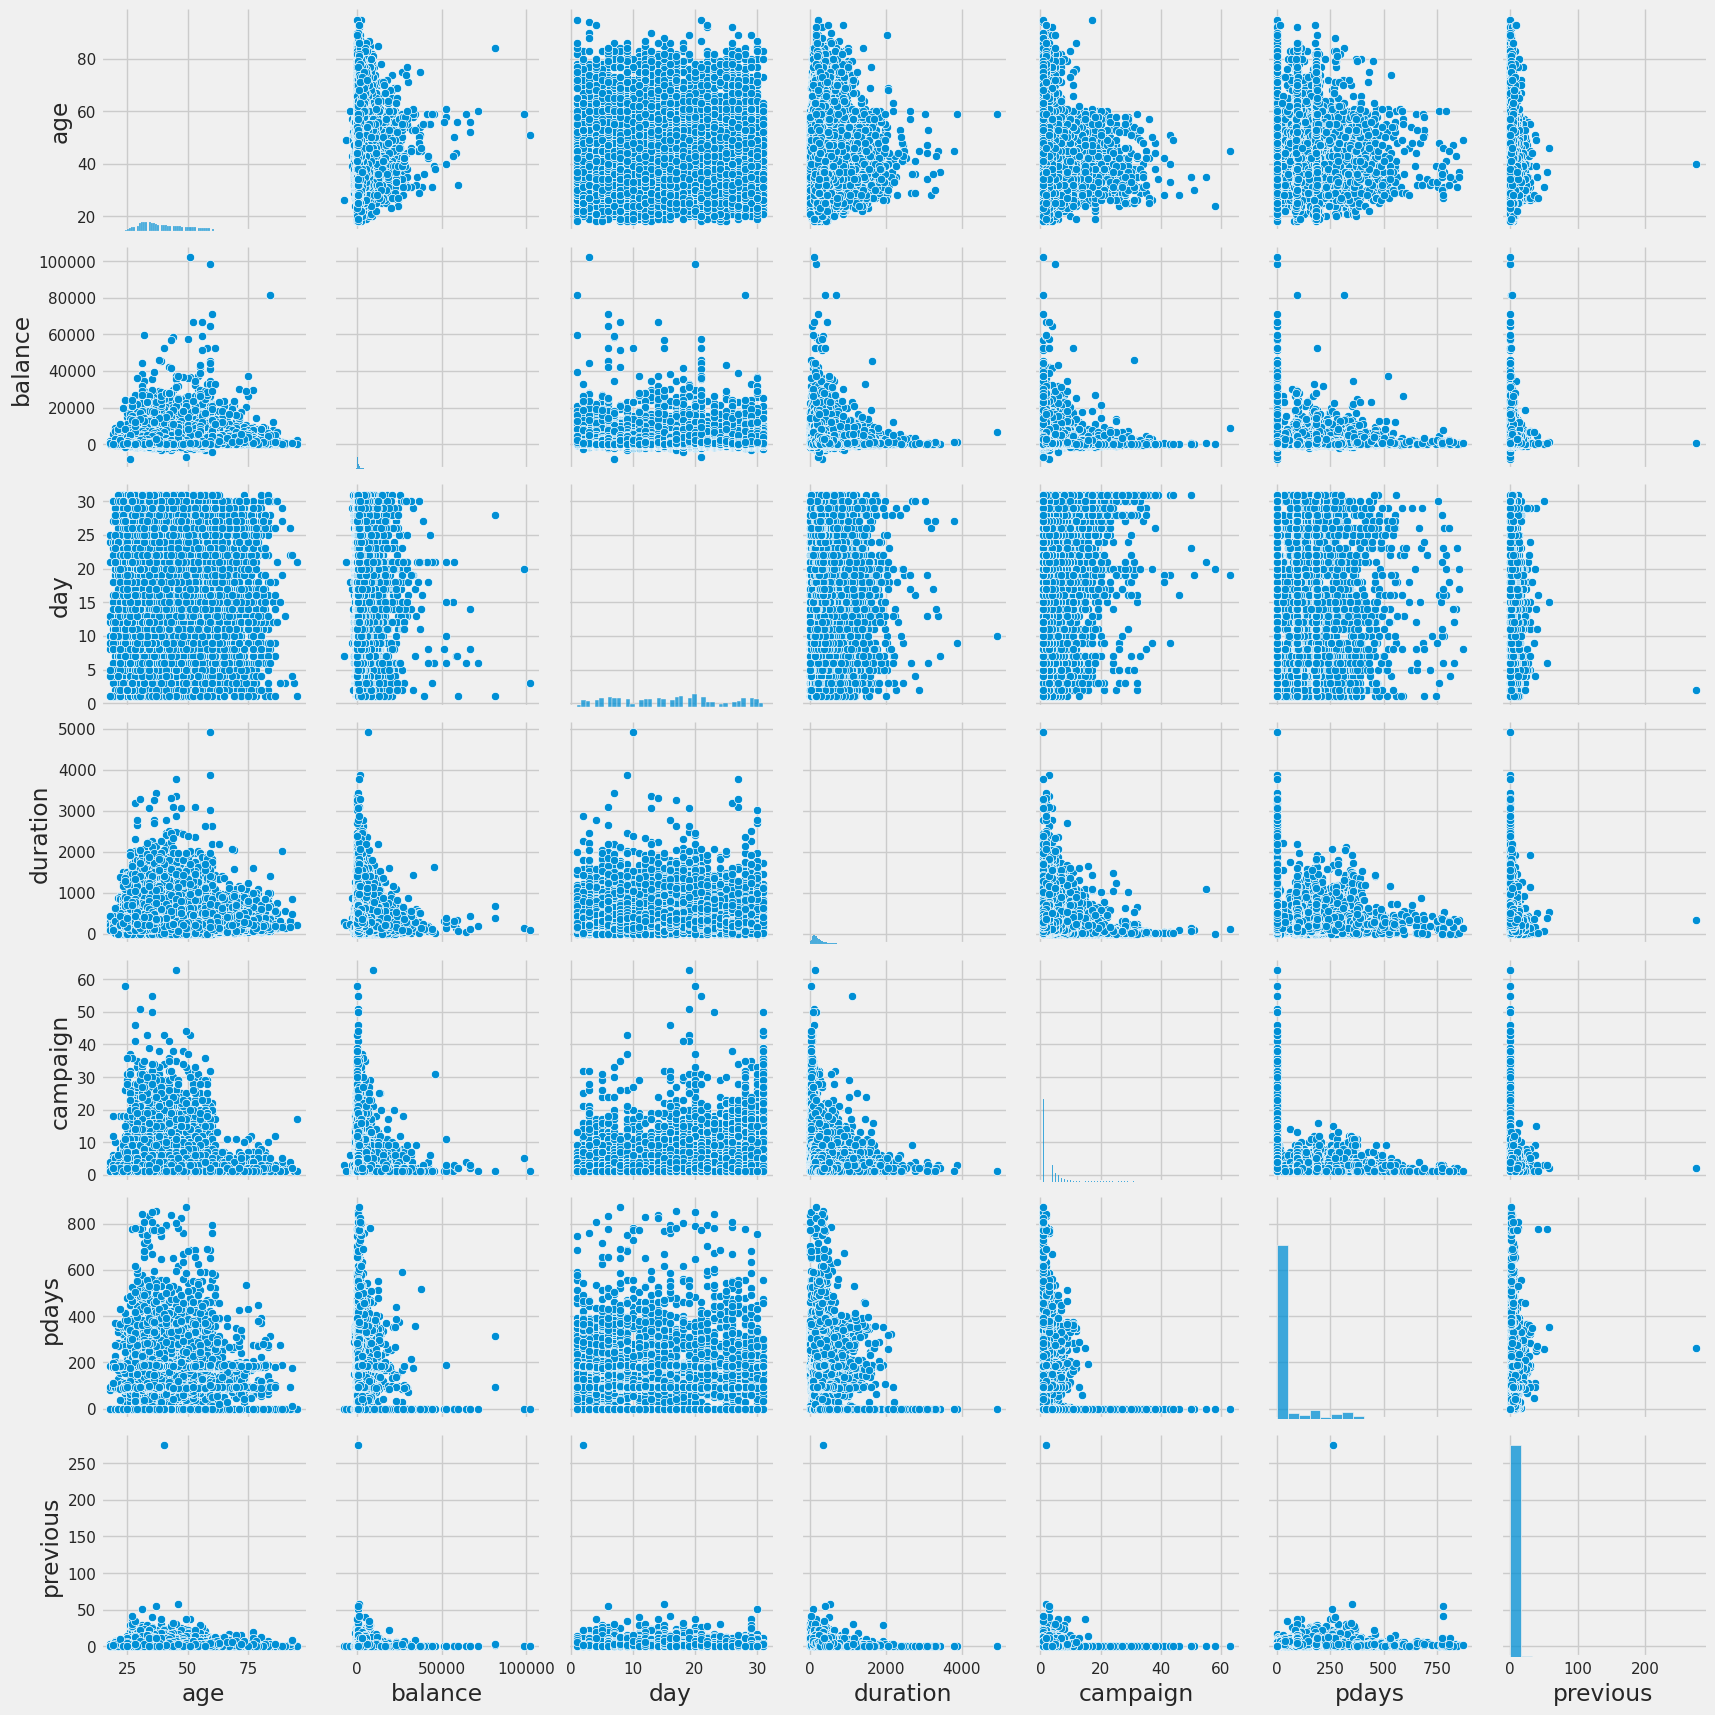

In [ ]:
sb.pairplot(data)

Text(0.5, 15.444444444444459, 'Age')

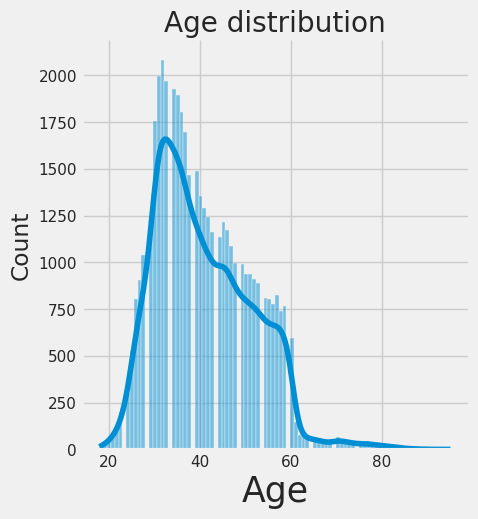

In [ ]:
hist_plot = sb.displot(data['age'], kde=True)
plt.title('Age distribution', fontweight=27)
plt.xlabel('Age', fontsize=25)

<ipython-input-29-ee44c9ad442b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['age'])


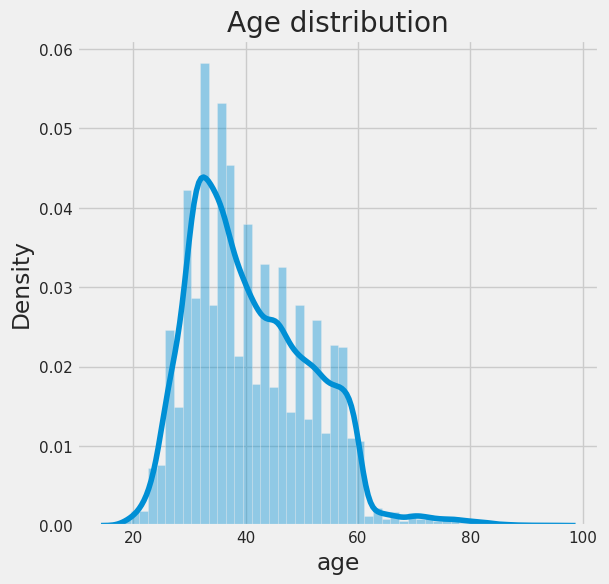

In [ ]:
sb.distplot(data['age'])
plt.title('Age distribution', fontweight=27)
plt.show()

<ipython-input-56-544522589aab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['campaign'])


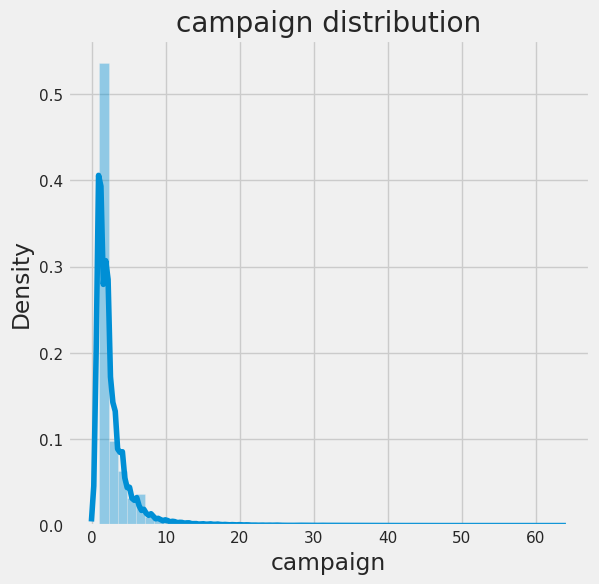

In [ ]:
sb.distplot(data['campaign'])
plt.title('campaign distribution', fontweight=27)
plt.show()

<ipython-input-57-67bfa6f923d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['previous'])


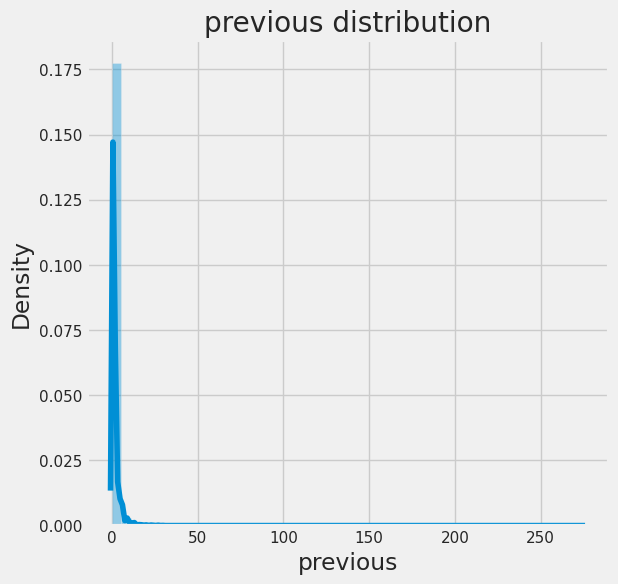

In [ ]:
sb.distplot(data['previous'])
plt.title('previous distribution', fontweight=27)
plt.show()

<ipython-input-58-3228f98de8cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['balance'])


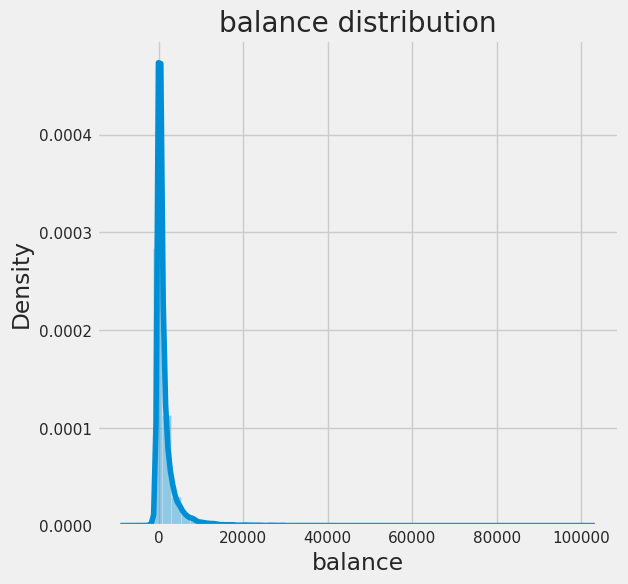

In [ ]:
sb.distplot(data['balance'])
plt.title('balance distribution', fontweight=27)
plt.show()

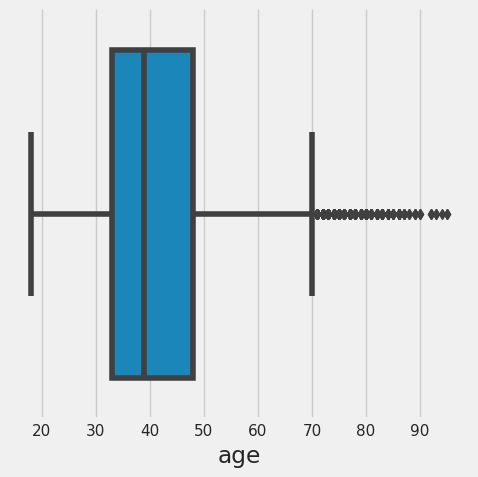

In [ ]:
sb.catplot(x ='age', kind = 'box', data = data)

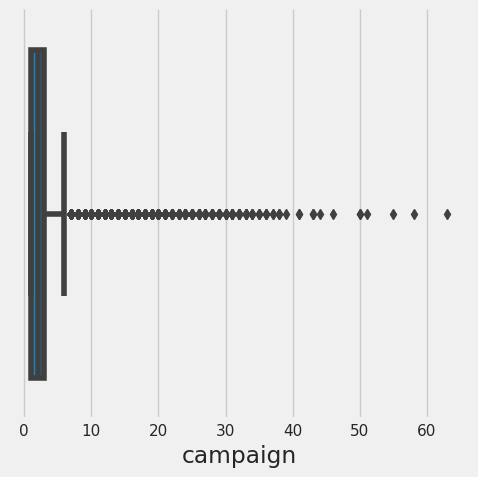

In [ ]:
sb.catplot(x ='campaign', kind = 'box', data = data)

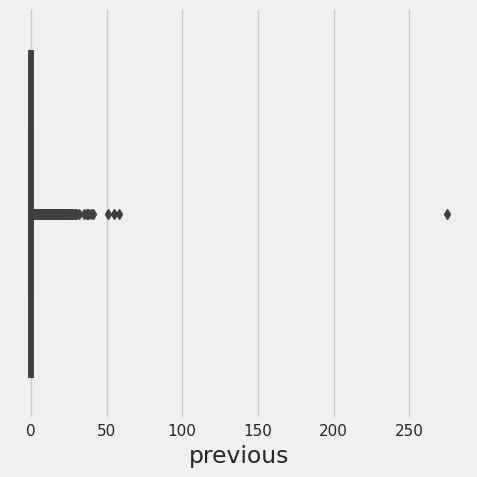

In [ ]:
sb.catplot(x ='previous', kind = 'box', data = data)

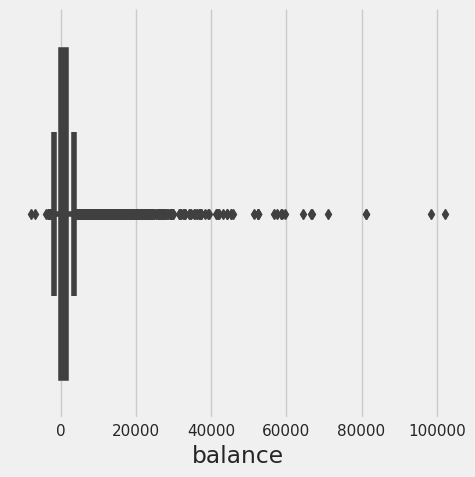

In [ ]:
sb.catplot(x ='balance', kind = 'box', data = data)

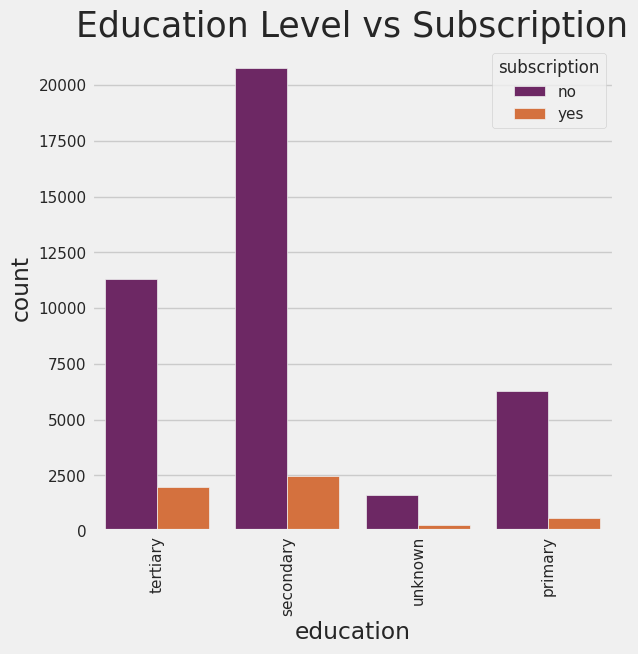

In [ ]:
sb.countplot(x=data['education'],data=data, hue=data['Target'],palette = 'inferno')
plt.title('Education Level vs Subscription', fontsize=25,fontweight=25)
plt.xticks(rotation='vertical')
plt.legend(title='subscription')
plt.show()

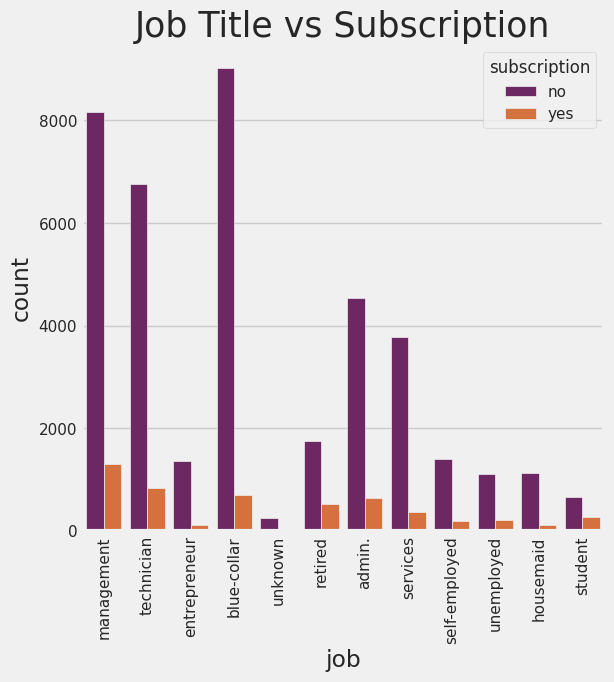

In [ ]:
sb.countplot(x=data['job'],data=data, hue=data['Target'],palette = 'inferno')
plt.title('Job Title vs Subscription', fontsize=25,fontweight=25)
plt.xticks(rotation='vertical')
plt.legend(title='subscription')
plt.show()

In [ ]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
data2 = data.copy()

In [ ]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#LOGISTIC REGRESSION

## Setting up a logistic regression model

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create an instance of LabelEncoder
le = LabelEncoder()

# Perform label encoding on the "Category" column
data["job_new"] = le.fit_transform(data["job"])

data["marital_new"] = le.fit_transform(data["marital"])

data["education_new"] = le.fit_transform(data["education"])

data["Target_new"] = le.fit_transform(data["Target"])

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,Target,job_new,marital_new,education_new,Target_new
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,4,1,2,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,9,2,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,2,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,1,1,3,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,11,2,3,0


In [ ]:
data.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
Target           0
job_new          0
marital_new      0
education_new    0
Target_new       0
dtype: int64

In [ ]:
# Define the independent and dependent variables
x = data[['marital_new','job_new','education_new','age']]
y = data['Target_new']

In [ ]:
# Split data set
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=43)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 4)
(11303, 4)
(33908,)
(11303,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [ ]:
# creating a model
model = LogisticRegression()

# model fitting
model.fit(x_train, y_train)

# generate predictions
y_Pred = model.predict(x_test)

In [ ]:
#overall accuracy
accuracy = accuracy_score(y_test, y_Pred)
print('Accuracy:', accuracy)

Accuracy: 0.8822436521277537


#Evaluating results


In [ ]:
#calculating the classification accuracies
print("Training Accuracy", model.score(x_train, y_train)) 
print("Testing Accuracy", model.score(x_test, y_test))

Training Accuracy 0.8832723840981479
Testing Accuracy 0.8822436521277537


In [ ]:
# generate classification report
report = classification_report(y_test, y_Pred)

# print the report
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      9972
           1       0.00      0.00      0.00      1331

    accuracy                           0.88     11303
   macro avg       0.44      0.50      0.47     11303
weighted avg       0.78      0.88      0.83     11303



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# area under curve
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = model.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_scores)
print('AUC:', auc_score)

AUC: 0.5817869297745182


In [ ]:
#not completed
#calculating the classification accuracies

print("Training Accuracy", model.score(x_train, y_train)) 
print("Testing Accuracy", model.score(x_test, y_test))

CR_RF = classification_report(y_test,y_Pred)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, y_Pred)
AUC_RF = roc_auc_score(fprRF, recallRF)

resultsRF = {"\nClassification Report":CR_RF,"\nArea Under Curve":AUC_RF}

#Printing the results
for measure in resultsRF:
  print(measure,": \n",resultsRF[measure])

Training Accuracy 0.8832723840981479
Testing Accuracy 0.8822436521277537

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      9972
           1       0.00      0.00      0.00      1331

    accuracy                           0.88     11303
   macro avg       0.44      0.50      0.47     11303
weighted avg       0.78      0.88      0.83     11303


Area Under Curve : 
 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
